In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 


In [2]:
data=pd.read_csv("ec2_network_in_257a54.csv")

In [3]:
data

,timestamp,value
0,2014-04-10 00:04:00,251643.0
1,2014-04-10 00:09:00,3203510.0
2,2014-04-10 00:14:00,287397.0
3,2014-04-10 00:19:00,238944.0
4,2014-04-10 00:24:00,245880.0
...,...,...
4027,2014-04-23 23:49:00,226809.0
4028,2014-04-23 23:54:00,237540.0
4029,2014-04-23 23:59:00,233857.0
4030,2014-04-24 00:04:00,238302.0


In [4]:
data.head()#first five rows

,timestamp,value
0,2014-04-10 00:04:00,251643.0
1,2014-04-10 00:09:00,3203510.0
2,2014-04-10 00:14:00,287397.0
3,2014-04-10 00:19:00,238944.0
4,2014-04-10 00:24:00,245880.0


In [5]:
data.tail()

,timestamp,value
4027,2014-04-23 23:49:00,226809.0
4028,2014-04-23 23:54:00,237540.0
4029,2014-04-23 23:59:00,233857.0
4030,2014-04-24 00:04:00,238302.0
4031,2014-04-24 00:09:00,242084.0


In [6]:
data.sample(5) #random data used

,timestamp,value
1536,2014-04-15 08:14:00,231670.0
449,2014-04-11 13:34:00,237706.0
496,2014-04-11 17:29:00,251403.0
608,2014-04-12 02:49:00,256480.0
1847,2014-04-16 10:09:00,251852.0


In [7]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [8]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

# basic cheak

In [9]:
data=pd.read_csv('ec2_network_in_257a54.csv',parse_dates=[0],index_col='timestamp')

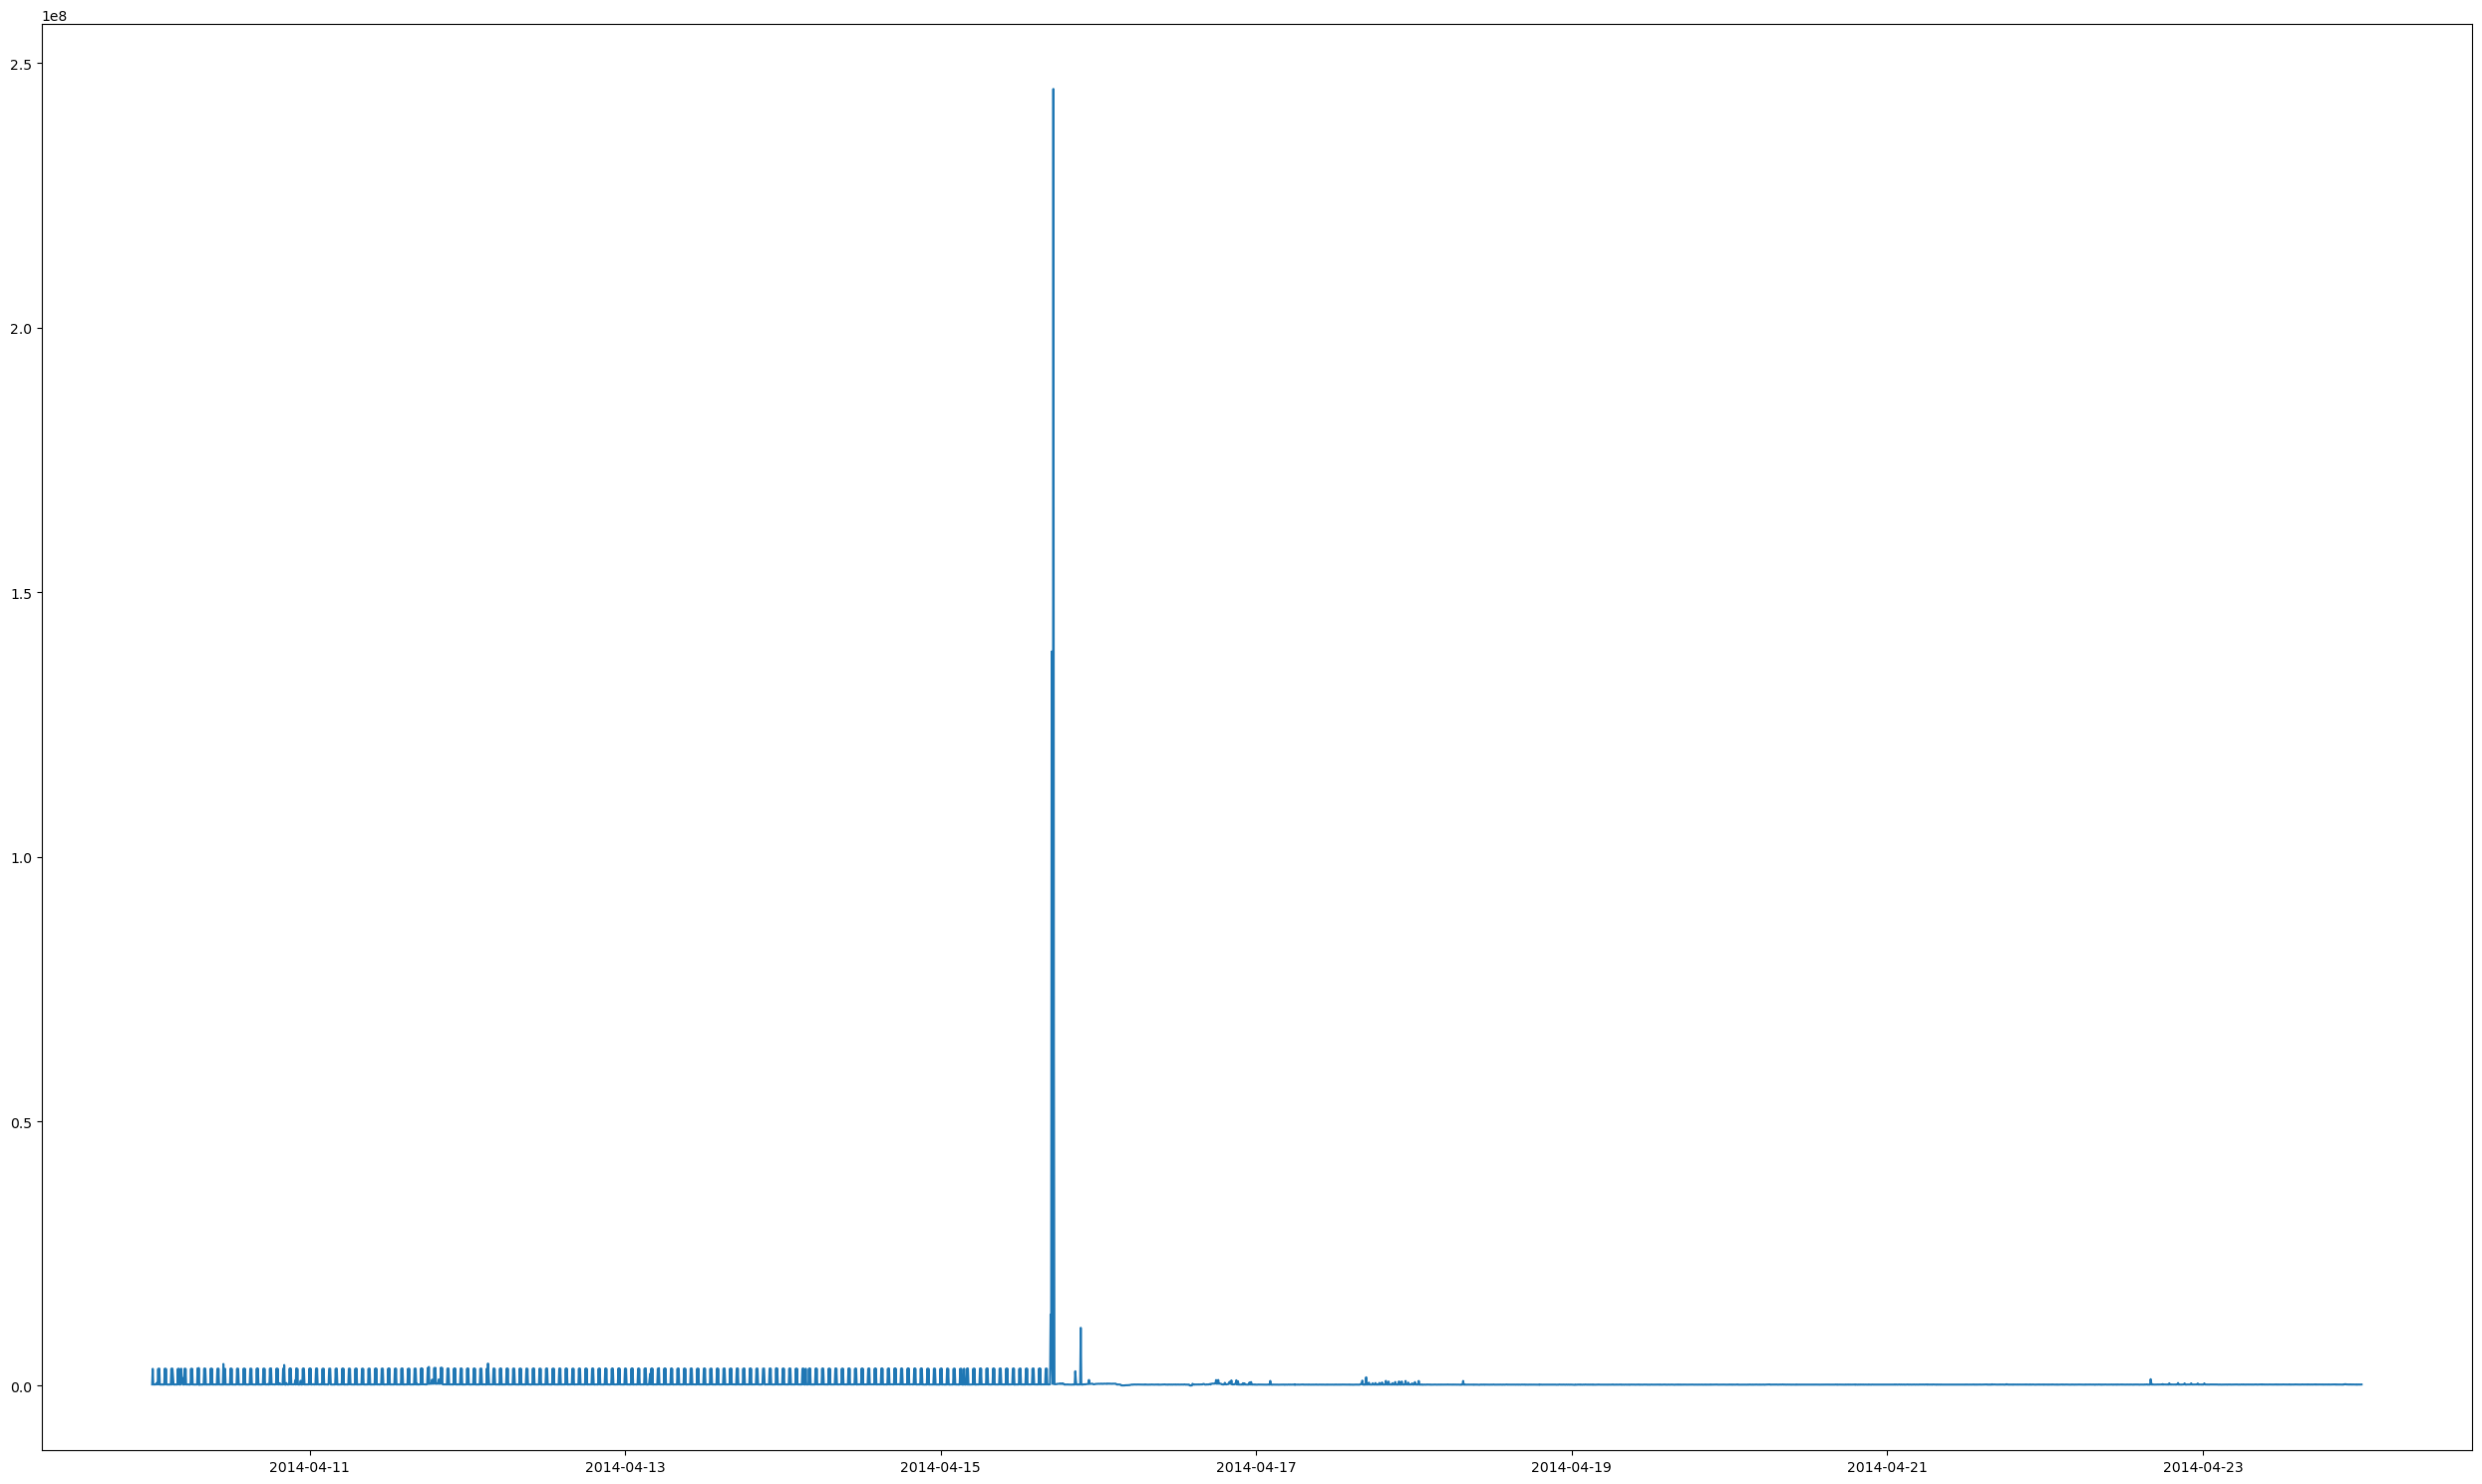

In [10]:
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

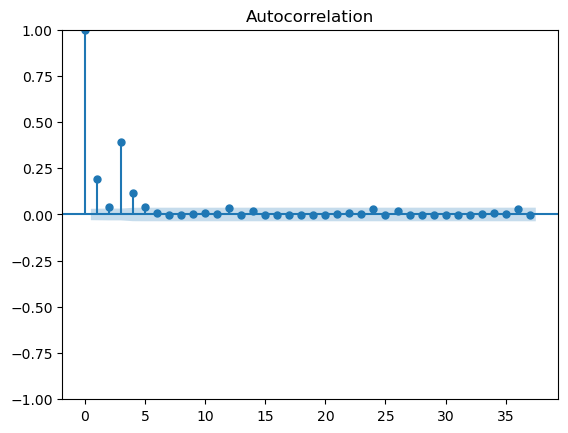

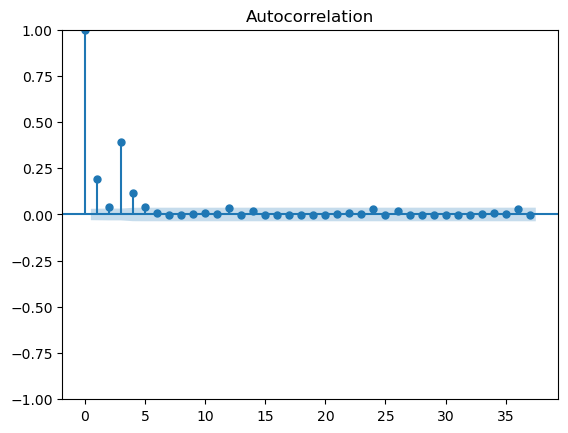

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [12]:
#From the autocorrelation plot, it is clear that given series is not stationary.

In [13]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [14]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -10.355116564168151
2. P-Value :  2.478233582983257e-18
3. Num Of Lags :  31
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4000
5. Critical Values :
	 1% :  -3.4319858753661405
	 5% :  -2.8622628402506254
	 10% :  -2.5671547755625


In [15]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s)
#hypothesis is low; hence the time series is non-stationary.

In [16]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-04-10 00:04:00,NaN
2014-04-10 00:09:00,2951867.0
2014-04-10 00:14:00,-2916113.0
2014-04-10 00:19:00,-48453.0
2014-04-10 00:24:00,6936.0
...,...
2014-04-23 23:49:00,-19868.0
2014-04-23 23:54:00,10731.0
2014-04-23 23:59:00,-3683.0


In [17]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-04-10 00:09:00,2951867.0
2014-04-10 00:14:00,-2916113.0
2014-04-10 00:19:00,-48453.0
2014-04-10 00:24:00,6936.0
2014-04-10 00:29:00,-11710.0
...,...
2014-04-23 23:49:00,-19868.0
2014-04-23 23:54:00,10731.0
2014-04-23 23:59:00,-3683.0


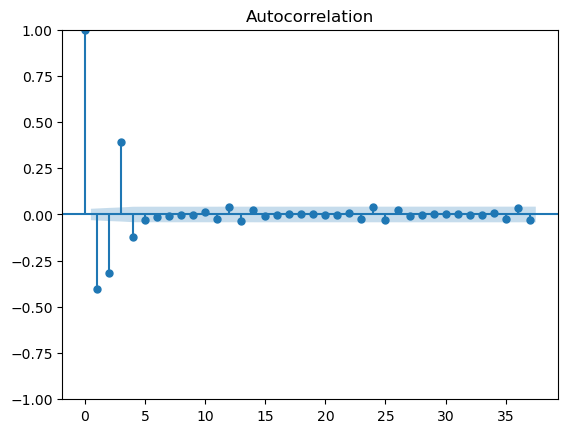

In [18]:
plot_acf(data1); # autocorrelation plot

In [19]:
data2=data1.diff(periods=1) # differencing applied to data1

In [20]:
data2=data2.iloc[1:] # integrated to the order of 2

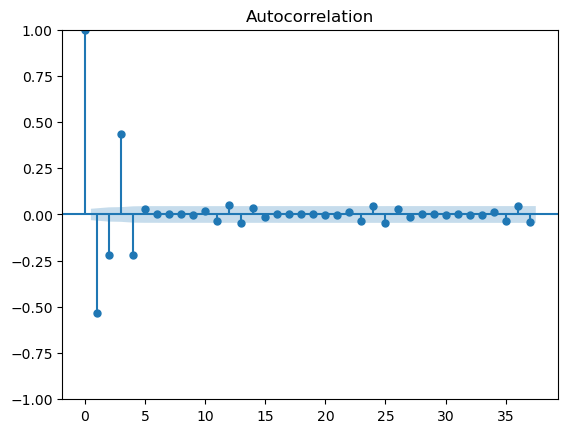

In [21]:
plot_acf(data2);

In [22]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [23]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-04-10 08:39:00 to 2014-04-24 00:09:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [24]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [25]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [31]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

In [29]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

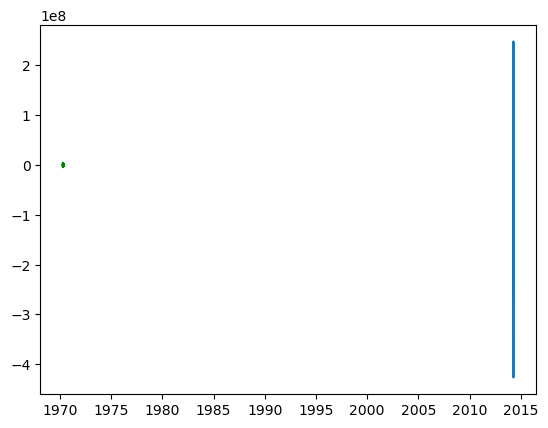

In [32]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [33]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [34]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [35]:
## evaluate the model
print(model_arima_fit.aic)

3237.4429214038264


In [36]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [37]:
prediction

1     -7.210713e+05
2     -4.794524e+06
3      2.522082e+06
4      4.629141e+04
5     -1.225821e+04
           ...     
138   -1.216543e+04
139   -1.210591e+04
140   -1.215812e+04
141   -1.211232e+04
142   -1.215249e+04
Name: predicted_mean, Length: 142, dtype: float64

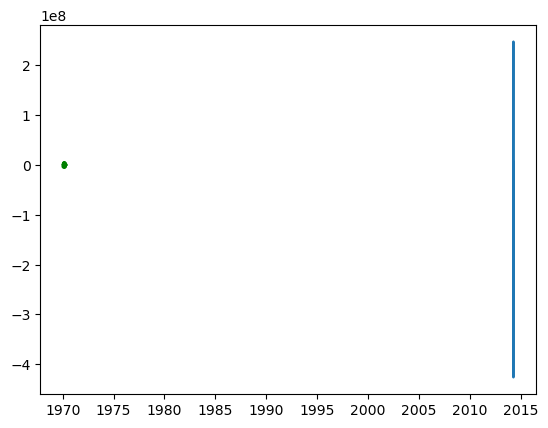

In [38]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [39]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [40]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 3651.1799430177125
(0, 0, 1) 3197.7841229136448
(0, 0, 2) 3152.4915665678163
(0, 0, 3) 3121.5860633714838
(0, 0, 4) 3112.802273635346
(0, 1, 0) 3383.580860293092
(0, 1, 1) 3287.210084048724
(0, 1, 2) 3231.2182947731108
(0, 1, 3) 3176.8777987993403
(0, 1, 4) 3236.803503814519
(0, 2, 0) 3479.2925883382372
(0, 2, 1) 3385.7141740374154
(0, 2, 2) 3343.0420451163623
(0, 2, 3) 3245.820466098524
(0, 2, 4) 3331.855884169692
(0, 3, 0) 3573.7927932692037
(0, 3, 1) 3484.8976998695325
(0, 3, 2) 3454.0226304117323
(0, 3, 3) 3358.3512676080095
(0, 3, 4) 3424.4045780332362
(0, 4, 0) 3666.501547530239
(0, 4, 1) 3581.7113099688895
(0, 4, 2) 3556.363772468399
(0, 4, 3) 3496.8842336991784
(0, 4, 4) 3528.685516799866
(1, 0, 0) 3166.875576811354
(1, 0, 1) 3117.7377227883107
(1, 0, 2) 3118.8553934639913
(1, 0, 3) 3110.5463065725335
(1, 0, 4) 3095.6820506578797
(1, 1, 0) 3237.4429214038264
(1, 1, 1) 3148.022331043886
(1, 1, 2) 3120.791461925499
(1, 1, 3) 3092.766549760336
(1, 1, 4) 3147.595020777195

In [41]:
min(list2)  # lowest aic score

3087.1442785788718

In [42]:
loc=list2.index(min(list2))
loc

63

In [43]:
# pdq corresponding to lowest aic
list1[loc]

(2, 2, 3)

In [44]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [45]:
print(model_arima_fit.aic) # confirm aic score

3100.7148284931113


In [46]:
forecast = model_arima_fit.forecast(steps=9)
forecast

100    -94201.793224
101   -661317.780634
102    319398.713683
103     50739.736836
104    198175.253947
105    -96066.404153
106   -263106.451205
107    -62720.258159
108      7275.703484
Name: predicted_mean, dtype: float64

In [47]:
prediction=model_arima_fit.predict(start=1,end=142)

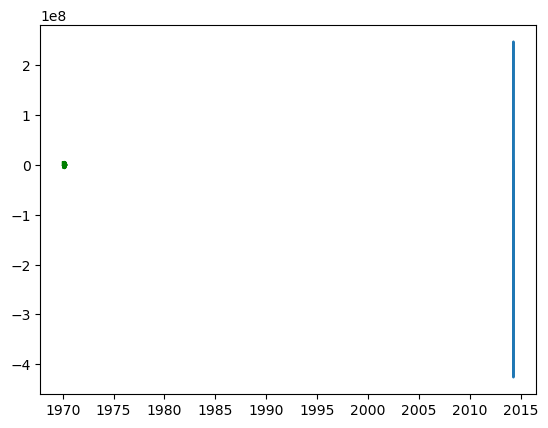

In [48]:
plt.plot(test)
plt.plot(prediction,color='green')

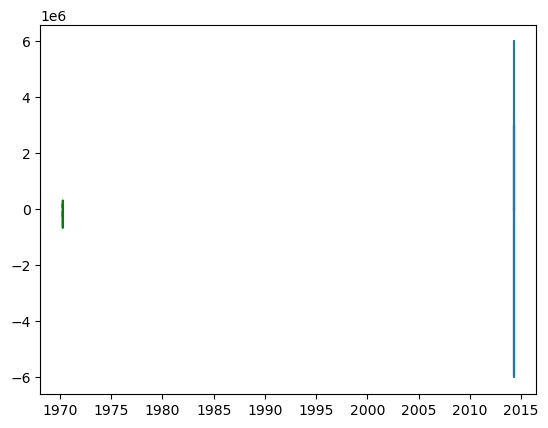

In [49]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [50]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([   13851.,   -17402.,    19970.,   -19976.,  3009978., -6005025.,
        5996428., -5965112.,  2956327.,    35080.,   -35317.,    35708.,
         -31858.,    16543.,   -17753.,    48195.,  2916915., -5924561.,
        5973118., -5992054.,  3001600.,   -26913.,    39862.,   -40482.,
          35963.])

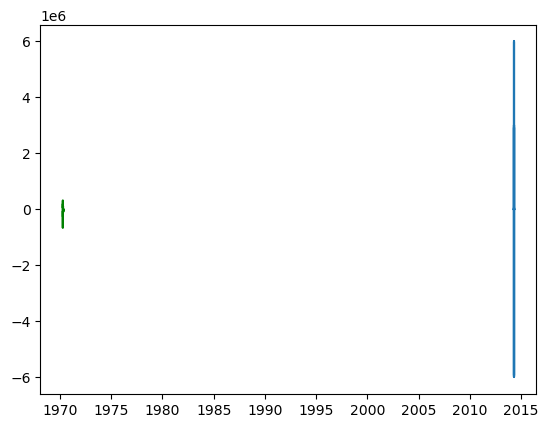

In [51]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [52]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 10005900537569.422,
 'mae': 1977253.4312308694,
 'rmse': 3163210.4794922234}

In [53]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

3163210.4794922234


10005900537569.422

# Conclusion